In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

Loading the Data

In [2]:
airdata= pd.read_csv("airdata.csv")

In [3]:
airdata

,Avg_Wind,Avg_Temp,Avg_Humidity,Avg_Barometer,Avg_Visbility
0,6.13,28.88,0.72,1012.00,15.00
1,5.00,25.88,0.86,1012.63,10.13
2,4.75,26.38,0.85,1011.75,11.63
3,3.88,26.88,0.78,1010.00,13.13
4,4.38,26.88,0.81,1010.63,13.88
...,...,...,...,...,...
1456,4.50,28.38,0.80,1013.38,12.63
1457,5.50,28.88,0.80,1012.13,13.88
1458,4.75,28.50,0.80,1010.50,13.25
1459,4.38,28.88,0.82,1010.25,13.50


Checking if there any missing values

There are 4 missing row values

In [ ]:
airdata.isna().sum() # Handling Missing Values

Avg_Wind         4
Avg_Temp         4
Avg_Humidity     4
Avg_Barometer    4
Avg_Visbility    4
dtype: int64

Using dropna() to remove the 4 missing row values

In [ ]:
df = airdata.dropna()
df = df.replace([np.inf, -np.inf], np.nan)

In [ ]:
df.isna().sum() # Checking if there any Missing Values

Avg_Wind         0
Avg_Temp         0
Avg_Humidity     0
Avg_Barometer    0
Avg_Visbility    0
dtype: int64

Before performing the K-means Clustering, Silhouette scoring was executed to know the number of optimal clusters.

k=2: Silhouette Score = 0.977
k=3: Silhouette Score = 0.974
k=4: Silhouette Score = 0.228
k=5: Silhouette Score = 0.241
k=6: Silhouette Score = 0.197
k=7: Silhouette Score = 0.197
k=8: Silhouette Score = 0.190
k=9: Silhouette Score = 0.191
k=10: Silhouette Score = 0.195


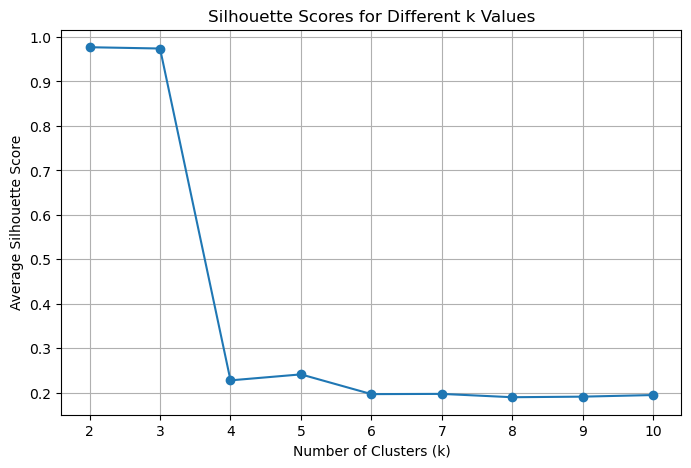

In [ ]:


k_range = range(2, 11) # Range of potential k values
silhouette_scores = []

for k in k_range:
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"k={k}: Silhouette Score = {silhouette_avg:.3f}")


plt.figure(figsize=(8, 5)) # Plot silhouette scores
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores for Different k Values")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.show()

Hence, the number of optimal clusters is 2 since it yielded silhouette score near 1.

Performing K-Means Clustering

In [9]:
df_ind = df.drop(columns="Avg_Humidity") # Removing the Target Variable

In [10]:
scaler = StandardScaler()
dfscaled = scaler.fit_transform(df_ind) # Only the independent variables are scaled

Standardizing the data without the target variable. It appears that Cluster 0 has 490 sample size and Cluster 1 has 967 sample size.

In [ ]:

kmeans = KMeans(n_clusters=2,random_state=42, n_init=10).fit(dfscaled) # Standardize data first
cluster_labels = kmeans.labels_
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
print("Sample counts per cluster:")
print(cluster_counts)


Sample counts per cluster:
0    490
1    967
Name: count, dtype: int64


Adding Cluster column on the dataset

In [ ]:
df['Cluster'] = cluster_labels # Adding the Clusters in the Dataframe
df

,Avg_Wind,Avg_Temp,Avg_Humidity,Avg_Barometer,Avg_Visbility,Cluster
0,6.13,28.88,0.72,1012.00,15.00,1
1,5.00,25.88,0.86,1012.63,10.13,0
2,4.75,26.38,0.85,1011.75,11.63,0
3,3.88,26.88,0.78,1010.00,13.13,0
4,4.38,26.88,0.81,1010.63,13.88,1
...,...,...,...,...,...,...
1456,4.50,28.38,0.80,1013.38,12.63,1
1457,5.50,28.88,0.80,1012.13,13.88,1
1458,4.75,28.50,0.80,1010.50,13.25,1
1459,4.38,28.88,0.82,1010.25,13.50,1


Summary of Descriptive Statistics on each Clusters

Cluster 0

In [13]:
cluster_0_stats = df[df['Cluster'] == 0].describe()
print(cluster_0_stats)

         Avg_Wind    Avg_Temp  Avg_Humidity  Avg_Barometer  Avg_Visbility  \
count  490.000000  490.000000    490.000000     490.000000     490.000000   
mean     4.037755   27.172306      0.831776    1007.154082      11.732429   
std      1.047438    0.912038      0.038114      17.975329       0.997153   
min      1.000000   23.000000      0.590000     840.170000       8.000000   
25%      3.380000   26.670000      0.810000    1008.447500      11.170000   
50%      4.000000   27.380000      0.830000    1009.500000      11.830000   
75%      4.670000   27.830000      0.860000    1010.500000      12.430000   
max      8.170000   29.140000      0.960000    1013.860000      14.000000   

       Cluster  
count    490.0  
mean       0.0  
std        0.0  
min        0.0  
25%        0.0  
50%        0.0  
75%        0.0  
max        0.0  


Cluster 1

In [14]:
cluster_1_stats = df[df['Cluster'] == 1].describe()
print(cluster_1_stats)

         Avg_Wind    Avg_Temp  Avg_Humidity  Avg_Barometer  Avg_Visbility  \
count  967.000000  967.000000    967.000000     967.000000     967.000000   
mean     4.429545   28.778583      0.769245    1009.452254      13.412358   
std      0.956569    0.737196      0.037850       1.510015       0.735919   
min      1.750000   26.630000      0.600000    1003.170000      11.630000   
25%      3.790000   28.280000      0.750000    1008.500000      12.880000   
50%      4.380000   28.750000      0.770000    1009.430000      13.290000   
75%      5.000000   29.250000      0.790000    1010.380000      13.880000   
max      7.430000   31.380000      0.850000    1014.500000      16.250000   

       Cluster  
count    967.0  
mean       1.0  
std        0.0  
min        1.0  
25%        1.0  
50%        1.0  
75%        1.0  
max        1.0  


Processing Cluster 0

In [ ]:
cluster = 0 # Processing Cluster 0
cluster_indices0 = np.where(cluster_labels==cluster)

Data Splittig

In [ ]:
X_cluster0 = df.drop(columns="Avg_Humidity").iloc[cluster_indices0] #Assigning for Input Variables
y_cluster0 = df["Avg_Humidity"].iloc[cluster_indices0] # Assigning for Output Variable

X_train0, X_test0, y_train0, y_test0 = train_test_split( # Split cluster data
    X_cluster0, 
    y_cluster0, 
    test_size=0.2, 
    stratify=pd.qcut(y_cluster0, q=10, duplicates="drop"),
    random_state=12019, shuffle=True
)
print(f"Cluster {cluster} sizes:")
print(f"- Train: {len(X_train0)} samples")
print(f"- Test: {len(X_test0)} samples\n")


Cluster 0 sizes:
- Train: 392 samples
- Test: 98 samples



Standardizing the Train and Test Data Set to ensure consistency

In [ ]:
scaler1 = StandardScaler() # Standardizing, seperately on Cluster 0
X_scaled_train0 = scaler1.fit_transform(X_train0)
X_scaled_test0 = scaler1.transform(X_test0)

KNN Model

In [18]:
knn0 = KNeighborsRegressor() # Knn


Hyperparameter and Tune Grid

In [ ]:
param_grid0 = { #Hyper Grid
    'n_neighbors': [1,25,1],  # More focused range
    'weights': ['distance'],  # Since it consistently performed better
    'metric': ['euclidean'],  # Consistently better in your results
}

In [ ]:
grid_search0 = GridSearchCV( # Traning Model
    knn0, 
    param_grid0, 
    cv=10, # 10 k-Fold
    scoring='neg_mean_squared_error',
    n_jobs=-1, # for cpu purpose
    verbose=1 # Shows progress "Fitting 10 fold for each"
)
grid_search0.fit(X_scaled_train0, y_train0) # Fitting the cluster 0 into the knn model 

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean'], 'n_neighbors': [1, 25, 1],
                         'weights': ['distance']},
             scoring='neg_mean_squared_error', verbose=1)

Training Results

In [21]:
# Get best model
best_knn = grid_search0.best_estimator_
best_params = grid_search0.best_params_
best_score = np.abs(grid_search0.best_score_)
print(f"Best parameters: {best_params}")
print(f"Best RMSE score:",np.sqrt(best_score))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}
Best RMSE score: 0.02892459116006962


In [ ]:
grid_search0 = GridSearchCV( # Training Model
    knn0, 
    param_grid0, 
    cv=10, # 10 k-Fold
    scoring='r2',
    n_jobs=-1, # for cpu purpose
    verbose=1 # Shows progress "Fitting 10 fold for each"
)
grid_search0.fit(X_scaled_train0, y_train0) # Fitting the cluster 0 into the knn model 

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean'], 'n_neighbors': [1, 25, 1],
                         'weights': ['distance']},
             scoring='r2', verbose=1)

Results

In [ ]:

best_knn = grid_search0.best_estimator_ # Get best model for Cluster 0
best_params = grid_search0.best_params_
best_score = grid_search0.best_score_

# Make predictions
y_pred = best_knn.predict(X_scaled_test0)

#0 Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test0, y_pred))
r2 = r2_score(y_test0, y_pred)

# Print comprehensive results
print("\nResults of Cluster 0")
print(f"Best parameters: {best_params}")
print(f"Best R 2 score: {best_score:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R 2: {r2:.4f}")


Results of Cluster 0
Best parameters: {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}
Best R 2 score: 0.3903
Test RMSE: 0.0329
Test R 2: 0.4098


The Cluster 0 with k-NN Model has an training R^2 of 39%, training RMSE: 0.02, while the testing R^2 is 40% and RME is 0.03

Since the testing R2 is greater than the training, the model does not overfit.

Processing Cluster 1

In [ ]:
cluster1 = 1
cluster_indices1 = np.where(cluster_labels==cluster1) #Processing Cluster 1

Data Splitting

In [ ]:
X_cluster1 = df.drop(columns="Avg_Humidity").iloc[cluster_indices1] #Assigning for Input Variables
y_cluster1 = df["Avg_Humidity"].iloc[cluster_indices1] # Assigning for Output Variable


X_train1, X_test1, y_train1, y_test1 = train_test_split( # Data Splitting for Cluster 1
    X_cluster1, 
    y_cluster1, 
    test_size=0.2,
      stratify=pd.qcut(y_cluster1, q=10, duplicates="drop"),
    random_state=12019, shuffle=True
)
print(f"Cluster {cluster1} sizes:")
print(f"- Train: {len(X_train1)} samples")
print(f"- Test: {len(X_test1)} samples\n")


Cluster 1 sizes:
- Train: 773 samples
- Test: 194 samples



Standardization

In [ ]:
scaler1 = StandardScaler() # Standardizing, seperately on Cluster 1
X_scaled_train1 = scaler1.fit_transform(X_train1)
X_scaled_test1 = scaler1.transform(X_test1)

Hyperparameter and Tune Grid

In [ ]:
param_grid1 = { #Hyper Grid
    'n_neighbors': [1,25,1],  # More focused range
    'weights': ['distance'],  # Since it consistently performed better
    'metric': ['euclidean'],  # Consistently better in your results
}

k-NN Modelling

In [32]:
knn1 = KNeighborsRegressor() # Knn

GridSearch and Modelling

In [ ]:
grid_search1 = GridSearchCV( 
   knn1, 
    param_grid1, 
    cv=10,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search1.fit(X_train1, y_train1)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean'], 'n_neighbors': [1, 25, 1],
                         'weights': ['distance']},
             scoring='neg_mean_squared_error', verbose=1)

In [34]:
# Get best model
best_knn1= grid_search1.best_estimator_
best_params1 = grid_search1.best_params_
best_score1 = np.abs(grid_search1.best_score_)
print(f"Best parameters: {best_params1}")
print(f"Best RMSE score:", np.sqrt(best_score1))

Best parameters: {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}
Best RMSE score: 0.028614429694905616


In [ ]:
grid_search1 = GridSearchCV( # Training Model
    knn1, 
    param_grid1, 
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)
grid_search1.fit(X_scaled_train1, y_train1)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'metric': ['euclidean'], 'n_neighbors': [1, 25, 1],
                         'weights': ['distance']},
             scoring='r2', verbose=1)

Results


In [ ]:
best_knn1= grid_search1.best_estimator_ # Get best model
best_params1 = grid_search1.best_params_
best_score1 = grid_search1.best_score_

y_pred1 = best_knn1.predict(X_scaled_test1)# Make predictions

rmse1 = np.sqrt(mean_squared_error(y_test1, y_pred1)) #Cluster 1 Calculate metrics
r21 = r2_score(y_test1, y_pred1)


print("\nResults of Cluster 1") # Print comprehensive results
print(f"Best parameters: {best_params1}")
print(f"Best R2 score: {best_score1:.4f}")
print(f"Test RMSE: {rmse1:.4f}")
print(f"Test R2: {r21:.4f}")


Results of Cluster 1
Best parameters: {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}
Best R2 score: 0.4364
Test RMSE: 0.0280
Test R2: 0.4796


The training R2 is 43% and trianing RMSE is 0.02. The Testing R2 is 47% and the test RMSE is 0.02. Since the R2 score of testing is greater than the training hence the model does not overfit.